<a href="https://colab.research.google.com/github/KevserAkbas/CnnMAske/blob/main/CnnMaske.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kimlik Doğrulama**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Lokalizasyon (Yerelleştirme) İşlemi**

In [ ]:
!mkdir -p drive
!ls

drive  sample_data


**Dosya Yerini Belirleme İşlemi**

In [ ]:
import os
os.chdir("/content/drive/My Drive/DerinOgrenmeUygulamalari/Uygulama3_CNNMaske/")
!pwd


/content/drive/My Drive/DerinOgrenmeUygulamalari/Uygulama3_CNNMaske


**Gerekli Kütüphanelerin Yüklenmesi**

In [ ]:
#Veri Ön İşleme
from os import listdir , mkdir
import imageio
from skimage.transform import resize

#Veriseti Bölme (Verisetini Eğitim Test Geçerleme Veri Kümesine Bölme ve Etiketleri Kodlama)
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Eğitim-Test Geçerleme
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Conv2D

#Grafiklendirme
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
import pandas as pd

**Veri Ön İşleme**

In [ ]:
#Veri Ön İşleme

from os import listdir, mkdir
import imageio
from skimage.transform import resize

etiketler= listdir ("Resimler_Orjinal")
etiketler.sort()
for i , etiket in enumerate(etiketler):
  mkdir ("Resimler_OnIslenmis" + "/" + etiket)
  etiket_klasoru = "Resimler_Orjinal" + "/" + etiket
  for resim_adi in listdir(etiket_klasoru):
    path = etiket_klasoru + "/" + resim_adi
    resim = imageio.imread (path, as_gray =True) #as_gray=True:"Gri", as_gray False:"RGB
    resim.flatten();
    resim = resize(resim,(48,48,1)) # boy, kanal:"1:Gri, 3:RGB"
    imageio.imwrite ("Resimler_OnIslenmis" + "/" + etiket + "/" + resim_adi , resim)

**Veriseti Bölme (Verisetini Eğitim-Test-Geçerleme Veri Kümesine Bölme ve Etiketleri Kodlama)**

In [ ]:
# Veriseti Bölme (Verisetini Eğitim-Test-Geçerleme Veri Kümesine Bölme ve Etiketleri Kodlama)

import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X, Y = [], []
for i , etiket in enumerate( etiketler):
  etiket_klasoru = "Resimler_OnIslenmis" + '/' + etiket
  for resim_adi in listdir(etiket_klasoru):
    path = etiket_klasoru + "/" + resim_adi
    resim = imageio.imread (path, as_gray =True) #as_gray=True:"Gri", as_gray False:"RGB
    resim.flatten();
    resim = resize(resim, (48, 48, 1)) # boy, kanal:"1:Gri, 3:RGB"
    X.append(resim)
    Y.append(i)

X = np.array (X).astype('float32')/255. #Gri
#X = np.array(X).astype('float32') #Renkli
X = X.reshape(X.shape[0], 48, 48, 1) # boy, kanal:"1:Gri, 3:RGB"
Y = np.array(Y).astype ('float32')
Y = to_categorical(Y, 2) #etiketSayisi: 2

x, x_test , y, y_test = train_test_split(X, Y, test_size =0.2, random_state =42, stratify=Y) #stratify verilen verisetinin esit dagilimda bolunmesini saglar
x_train, x_val , y_train , y_val = train_test_split (x, y, test_size =0.25, random_state =42, stratify=y)
np.save('VeriSetleri/x_train.npy', x_train)
np.save('VeriSetleri/x_test.npy', x_test)
np.save('VeriSetleri/x_val.npy', x_val)
np.save('VeriSetleri/y_train.npy', y_train)
np.save('VeriSetleri/y_test.npy', y_test)
np.save('VeriSetleri/y_val.npy', y_val)


In [ ]:
#Örnek Gösterim
from matplotlib import pyplot as plt
plt.imshow(np.squeeze(X[10]))
plt.show()

**Eğitim Test**

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, AveragePooling2D, Dropout, Flatten, Conv2D

x_train = np.load('VeriSetleri/x_train.npy')
x_test = np.load('VeriSetleri/x_test.npy')
x_val = np.load('VeriSetleri/x_val.npy')
y_train = np.load('VeriSetleri/y_train.npy')
y_test = np.load('VeriSetleri/y_test.npy')
y_val = np.load('VeriSetleri/y_val.npy')

keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu', input_shape =(48, 48, 1))) # boy, kanal
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(4,4))) 
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size =(4,4)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='sigmoid')) #etiketSayisi:2

model.summary()

model.compile(loss=keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.Adamax(),
  #optimizer=tf.keras.optimizers.RMSprop(),
  #optimizer=tf.keras.optimizers.SGD(lr=0.1),
  #optimizer=tf.keras.optimizers.Adam(lr=0.01),
  metrics=['accuracy'])

history = model.fit(x_train , y_train,
  batch_size=32,
  epochs=10,
  verbose=1,
  validation_data=(x_test , y_test))
model.save('MaskeModel.h5')
keras.backend.clear_session()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 256)         295168    
                                                        

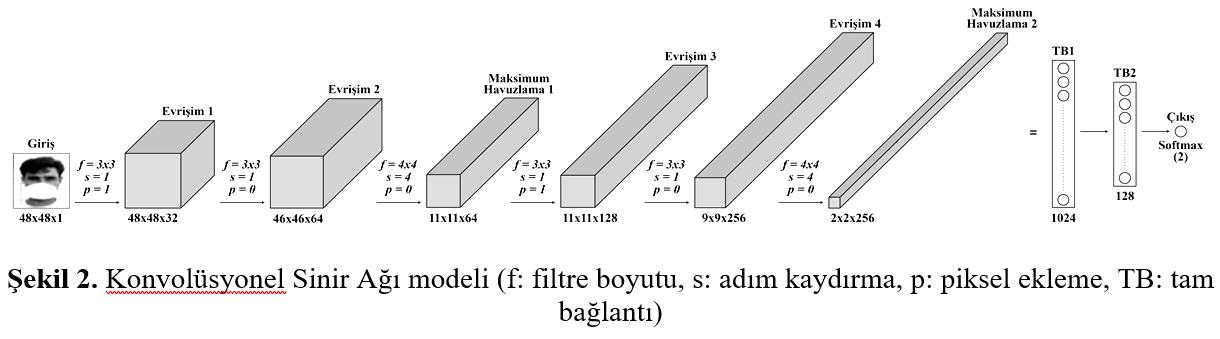

**Geçerleme**

In [ ]:
#sistemin görmediği 275 resim 
score = model.evaluate (x_val , y_val , verbose=1)
print('Geçerleme Loss/ Kayıp :', score[0])
print('Geçerleme Accuracy/ Doğruluk :', score[1])

9/9 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.9455
Geçerleme Loss/ Kayıp : 0.16612549126148224
Geçerleme Accuracy/ Doğruluk : 0.9454545378684998


In [ ]:
x_val.shape # içinde 48x48 formatında 275 tane resim var

(275, 48, 48, 1)

In [ ]:
x_train.shape

(825, 48, 48, 1)

In [ ]:
x_test.shape

(276, 48, 48, 1)

**Grafiklendirme (Eğitim Test)**

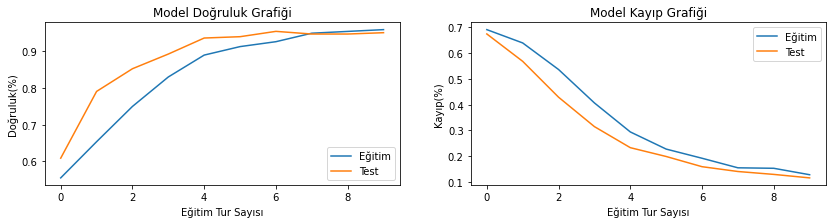

In [ ]:
from matplotlib import pyplot as plt

# Model Doğruluk ve Kayıp Grafikleri
plt.figure(figsize =(14.,3.))
plt.subplots_adjust(hspace =0.4)
plt.subplot(1, 2,1)
plt.plot(history.history ['accuracy'])
plt.plot(history.history['val_accuracy']) 
plt.title('Model Doğruluk Grafiği')
plt.ylabel('Doğruluk(%)')
plt.xlabel('Eğitim Tur Sayısı')
plt.legend(['Eğitim', 'Test'], loc='lower right')

plt.subplot(1, 2,2)
plt.plot(history.history ['loss'])
plt.plot(history.history ['val_loss'])
plt.title('Model Kayıp Grafiği')
plt.ylabel('Kayıp(%)')
plt.xlabel('Eğitim Tur Sayısı')
plt.legend(['Eğitim', 'Test'], loc='upper right')

plt.show()

**Grafiklendirme (Geçerleme)**

[[131   7]
 [  8 129]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       138
           1       0.95      0.94      0.95       137

    accuracy                           0.95       275
   macro avg       0.95      0.95      0.95       275
weighted avg       0.95      0.95      0.95       275



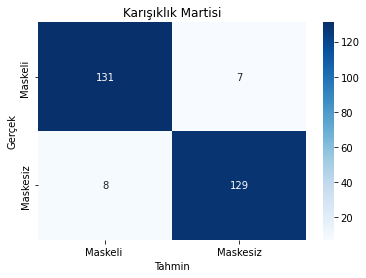

In [ ]:
#Karışılık Matrisi (Confusion Matrix)
from sklearn.metrics import confusion_matrix , classification_report
y_true = np.argmax (y_val , axis=1)
predict_x = model.predict (x_val)
y_pred= np.argmax (predict_x , axis=1)
cf_matrix= confusion_matrix (y_true , y_pred)
print(cf_matrix)
classification_report= classification_report(y_true , y_pred) 
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Maskeli ', 'Maskesiz']
cf_matrix_df= pd.DataFrame(cf_matrix,
  index = classes,
  columns = classes)  
sns.heatmap(cf_matrix_df , annot =True, fmt ="d", cmap=plt.cm.Blues)
plt.title('Karışıklık Martisi')
plt.ylabel('Gerçek')
plt.xlabel('Tahmin')
plt.show()